In [31]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [32]:
# Reading the CSV files into data frames
search_times_df = pd.read_csv('search-times-dataset.csv')
firing_rates_df = pd.read_csv('firing-rates-dataset.csv')

In [33]:
# Display the first few rows of the dataframe to inspect its structure and contents
search_times_df.head()

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
0,Colour,Colour,Pattern,Pattern,Chevron,Chevron,Far,Far,Middle,Middle,Near,Near,Small,Small,Medium,Medium,Large,Large
1,Oddball L,Oddball R,Oddball L,Oddball R,Oddball L,Oddball R,Oddball L,Oddball R,Oddball L,Oddball R,Oddball L,Oddball R,Oddball L,Oddball R,Oddball L,Oddball R,Oddball L,Oddball R
2,375,5025,771,1319,485,501,607,826,767,602,545,710,1257,655,547,494,499,495
3,1425,1146,1490,1149,554,655,653,1210,546,766,490,548,880,719,655,820,605,497
4,2088,1540,1532,1431,820,932,707,710,545,879,431,435,981,550,658,710,438,495


# Q. 1
## Computation of average search delays, relative entropy distance per neuron, and $l1$ distance per neuron.

### 1. (a) Finding average search delays

In [34]:
def calculate_average(df, col_idx):
    col_values = df.iloc[2:, col_idx].astype(float) - 328.0
    # Excluding the first two rows(index 0 and 1) as they contain only titles, not actual values
    # Converting the values from string to float for numerical operations
    # Subtracting the baseline reaction time of 328ms to isolate search delays
    return float(col_values.mean())

In [35]:
# Computing the average search delay for each image pair (columns 0 to 17) and store the results in a list
average_search_delays = [calculate_average(search_times_df, i) for i in range(0, 18)]
print(average_search_delays)

[883.7777777777778, 1081.4027777777778, 985.25, 1009.1388888888889, 275.2638888888889, 296.6666666666667, 503.31944444444446, 502.7916666666667, 313.40277777777777, 307.52777777777777, 218.55555555555554, 251.95833333333334, 818.3333333333334, 615.2361111111111, 309.40277777777777, 341.93055555555554, 239.84722222222223, 209.38888888888889]


In [36]:
# Display the first few rows of the dataframe to inspect its structure and contents
firing_rates_df.head()

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
0,Colour,Colour,Pattern,Pattern,Chevron,Chevron,Far,Far,Middle,Middle,Near,Near,Small,Small,Medium,Medium,Large,Large
1,L,R,L,R,L,R,L,R,L,R,L,R,L,R,L,R,L,R
2,24,21.23076923,44.61538462,38.66666667,25.53846154,38,10,21.33333333,5.333333333,28.66666667,4.333333333,29,26.33333333,46.66666667,20.66666667,50.76923077,21.66666667,40.33333333
3,25.53846154,11.69230769,30.76923077,19,16.61538462,23.66666667,29,35.33333333,15.33333333,37.33333333,17.66666667,37.33333333,33.66666667,29.33333333,16,20,17.33333333,19.33333333
4,2.333333333,5,5.666666667,5,11.66666667,13.33333333,17,14.33333333,14.33333333,19,11.33333333,16,20.66666667,17.33333333,14.33333333,16.66666667,10.33333333,13.66666667


### 1. (b) Finding relative entropy distance per neuron

Given an oddball image $ i $ with firing rates $ \lambda_i = [\lambda_i(1), \dots, \lambda_i(N)]^{\top} $ and a distracter image $ j $ with firing rates 
$ \lambda_j = [\lambda_j(1), \dots, \lambda_j(N)]^{\top} $, where $ N $ is the number of neurons, the relative entropy distance per neuron between images $ i $ and $ j $ is defined as$$D_{ij} := \frac{1}{N} \sum_{n=1}^{N} \left[ \lambda_i(n) \log \frac{\lambda_i(n)}{\lambda_j(n)} - \lambda_i(n) + \lambda_j(n) \right].$$

In [37]:
def compute_relative_entropy_distance(lambda_i, lambda_j):
    lambda_i = lambda_i.astype(float)
    lambda_j = lambda_j.astype(float)
    # Replacing 0s with NaN to avoid log(0) and division by 0
    lambda_i = lambda_i.replace(0, np.nan)
    lambda_j = lambda_j.replace(0, np.nan)
    # Computing the relative entropy distance using the given formula
    relative_entropy = lambda_i*(np.log(lambda_i / lambda_j)) - lambda_i + lambda_j
    # Return the mean of the computed values
    return float(relative_entropy.mean())

In [38]:
# Compute the relative entropy distance for each pair of adjacent columns; first i,i+1 then i+1,i
relative_entropy_distances = []
for i in range(0, 17, 2):
    relative_entropy_distances.append(compute_relative_entropy_distance(firing_rates_df.iloc[2:, i], firing_rates_df.iloc[2:, i+1]))
    relative_entropy_distances.append(compute_relative_entropy_distance(firing_rates_df.iloc[2:, i+1], firing_rates_df.iloc[2:, i]))

print(relative_entropy_distances)

[0.6383479384257953, 0.6183570539491742, 0.6568505110011884, 0.6629365149281123, 1.5533732543967032, 1.6307647870434872, 1.1167733701360314, 1.0901119359008282, 1.461938324013528, 1.5654859665288952, 1.774730947237426, 2.1278376887052746, 0.6542809923589478, 0.7841652488997836, 1.1306061278763084, 1.477290414634093, 1.6434411681388326, 1.7249862301952175]


### 1. (c) Finding $l1$ distances per neuron

Given an oddball image $ i $ with firing rates $ \lambda_i = [\lambda_i(1), \dots, \lambda_i(N)]^{\top} $ and a distracter image $ j $ with firing rates 
$ \lambda_j = [\lambda_j(1), \dots, \lambda_j(N)]^{\top} $, where $ N $ is the number of neurons, the $l1$ distance per neuron between images $ i $ and $ j $ is defined as

$$L_{ij} := \frac{1}{N} \sum_{n=1}^{N} \left| \lambda_i(n) - \lambda_j(n) \right|$$

In [39]:
def compute_L_1_distance(lambda_i, lambda_j):
    # Convert input series to float for numerical operations
    lambda_i = lambda_i.astype(float)
    lambda_j = lambda_j.astype(float)
    # Compute the L1 distance as the mean of absolute difference
    L_ij = (np.abs(lambda_i - lambda_j)).mean()

    # Return the result as a float
    return float(L_ij)

In [40]:
# Compute the L1 distance for each pair of adjacent columns in steps of 2
L_1_distances = []
for i in range(0, 17, 2):
    # Compute L1 distance from column i to column i+1
    L_1_distances.append(compute_L_1_distance(firing_rates_df.iloc[2:, i], firing_rates_df.iloc[2:, i+1]))
    # Compute L1 distance from column i+1 to column i (reverse order)
    L_1_distances.append(compute_L_1_distance(firing_rates_df.iloc[2:, i+1], firing_rates_df.iloc[2:, i]))

print(L_1_distances)

[2.775678497586207, 2.775678497586207, 3.2063306807643683, 3.2063306807643683, 4.79391394082184, 4.79391394082184, 3.791582734286885, 3.791582734286885, 4.134551241049181, 4.134551241049181, 4.729698940967213, 4.729698940967213, 3.1110865740438594, 3.1110865740438594, 3.945098030385965, 3.945098030385965, 5.459295090763157, 5.459295090763157]


# Q. 2

## 2. (a) Fitting a straight line through origin with relative entopy distances on x-axis and inverse of search delays on the y-axis

In [41]:
inverse_average_search_delays = 1.0/np.array(average_search_delays)
inverse_average_search_delays #verifying the code

array([0.00113151, 0.00092472, 0.00101497, 0.00099094, 0.00363288,
       0.00337079, 0.00198681, 0.0019889 , 0.00319078, 0.00325174,
       0.0045755 , 0.00396891, 0.001222  , 0.00162539, 0.00323203,
       0.00292457, 0.00416932, 0.0047758 ])

In [42]:
x_axis_relative_entropy = np.array(relative_entropy_distances)
y_axis = inverse_average_search_delays

The slope $ m $ of the best-fit line through the origin is derived using the least squares method. Normally, in linear regression, we fit a model of the form: $y = mx + b$,
where $m$ is the slope and $b$ is the intercept. When the line is constrained to pass through the origin ($b = 0$), the least squares criterion minimizes the sum of squared errors:
$$S = \sum (y - mx)^2$$
To find $m$, we take the derivative of $S$ with respect to $m$ and set it to zero (because we want to minimize this error):
$$\frac{dS}{dm} = -2 \sum x(y - mx) = 0$$
Solving for $m$, we get:
$$m = \frac{\sum x y}{\sum x^2}$$


In [43]:
def compute_slope_through_origin(x, y):
    # Computes the slope of a best-fit line through the origin using least squares regression.
    return np.sum(x * y) / np.sum(x ** 2)

In [44]:
slope_1 = compute_slope_through_origin(x_axis_relative_entropy, y_axis)
print(slope_1)

0.002201685956532322


### Plotting both the actual points and fitted line to get a graphical understanding

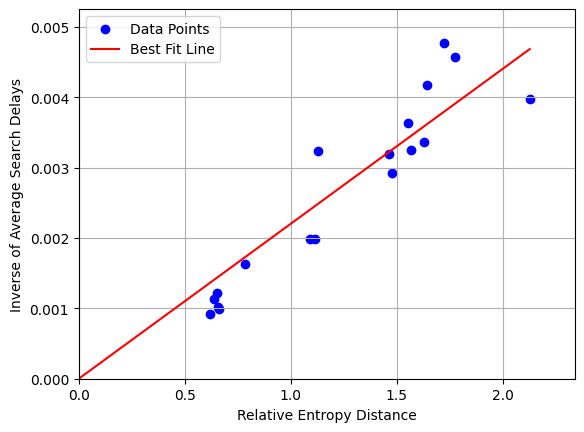

In [45]:
fitted_y_1 = slope_1 * x_axis_relative_entropy

# Ensure the best-fit line extends from (0,0)
x_fit = np.linspace(0, np.max(x_axis_relative_entropy), 100)  # Generate x values from 0 to max
y_fit = slope_1 * x_fit  # Compute corresponding y values

# Scatter plot
plt.scatter(x_axis_relative_entropy, y_axis, color="blue", label="Data Points")

# Best-fit line passing through the origin
plt.plot(x_fit, y_fit, color="red", label="Best Fit Line")

# Ensure the origin is visible
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Horizontal axis
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Vertical axis

# Adjust limits to ensure (0,0) is included
plt.xlim(0, np.max(x_axis_relative_entropy)*1.1)  # Slight padding for better visibility
plt.ylim(0, np.max(y_axis)*1.1)

plt.xlabel("Relative Entropy Distance")
plt.ylabel("Inverse of Average Search Delays")
plt.legend()
plt.grid(True)
plt.show() # Can use plt.savefig as well but then everytime we run the code, a plot will be saved

## 2. (b) Fitting a straight line passing through the origin with $l1$ distances on the x‐axis and inverse of average search delays on the y‐axis

In [46]:
x_axis_L1_distances = np.array(L_1_distances)

In [47]:
slope_2 = compute_slope_through_origin(x_axis_L1_distances, y_axis)
print(slope_2)

0.0007000776902229355


### Plotting both the actual points and fitted line to get a graphical understanding

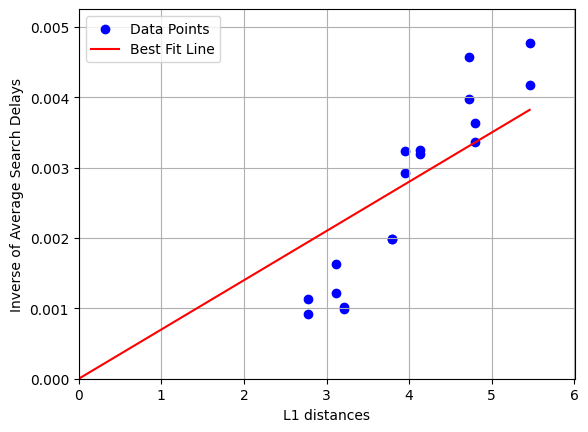

In [48]:
fitted_y_2 = slope_2*x_axis_L1_distances

# Ensure the best-fit line extends from (0,0)
x_fit = np.linspace(0, np.max(x_axis_L1_distances), 100)  # Generate x values from 0 to max
y_fit = slope_2 * x_fit  # Compute corresponding y values

# Scatter plot
plt.scatter(x_axis_L1_distances, y_axis, color="blue", label="Data Points")

# Best-fit line passing through the origin
plt.plot(x_fit, y_fit, color="red", label="Best Fit Line")

# Ensure the origin is visible
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Horizontal axis
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Vertical axis

# Adjust limits to ensure (0,0) is included
plt.xlim(0, np.max(x_axis_L1_distances) * 1.1)  # Slight padding for better visibility
plt.ylim(0, np.max(y_axis) * 1.1)

plt.xlabel("L1 distances")
plt.ylabel("Inverse of Average Search Delays")
plt.legend()
plt.grid(True)
plt.show() # Can use plt.savefig as well but then everytime we run the code, a plot will be saved

## Finding which of the above 2 lines was a better fit using mean square error

In [49]:
# Calculate Mean Squared Error for the line computed using Relative Entropy Distances
mse_1 = np.mean((y_axis - fitted_y_1)**2)
# Calculate Mean Squared Error for the line computed using L1 Distances
mse_2 = np.mean((y_axis - fitted_y_2)**2)

# Print the MSE values to compare the performance of both fitting methods
print(f"MSE for Line computed using Relative Entropy Distances: {mse_1}")
print(f"MSE for Line computred using L1 Distances: {mse_2}")

# Determine which method provides a better fit (lower MSE)
better_fit = "Line computed using Relative Entropy Distances" if mse_1<mse_2 else "Line computed using L1 Distances"
print(f"The better fit is: {better_fit}")

MSE for Line computed using Relative Entropy Distances: 2.295312895628889e-07
MSE for Line computred using L1 Distances: 5.827512203447879e-07
The better fit is: Line computed using Relative Entropy Distances


# Q 3. Fitting a Gamma distribution to the search delays.

## 3. (a) 
Randomly select half the number of columns in the search times data set. For each column selected, compute the mean and standard deviation of its values (after subtracting 328 ms from the search times). Store the mean values in an array named mean_search_delays and the standard deviation values in an array named
std_search_delays. Plot the standard deviation of the search delays against their means. From the plot, estimate the shape parameter and print its value.

In [50]:
# Set seed for reproducibility
np.random.seed(20)

# Select half of the total columns randomly
selected_columns = np.random.choice(
    search_times_df.iloc[2:].astype(float).columns,  
    size=len(search_times_df.iloc[2:].astype(float).columns) // 2,  
    replace=False  
)
# Extract the selected columns from the dataframe
selected_data = search_times_df.iloc[2:].astype(float)[selected_columns]
# Adjust the selected data by subtracting the baseline reaction time (328 ms)
adjusted_data = selected_data - 328

In [51]:
mean_search_delays = adjusted_data.mean().values
std_search_delays = adjusted_data.std().values

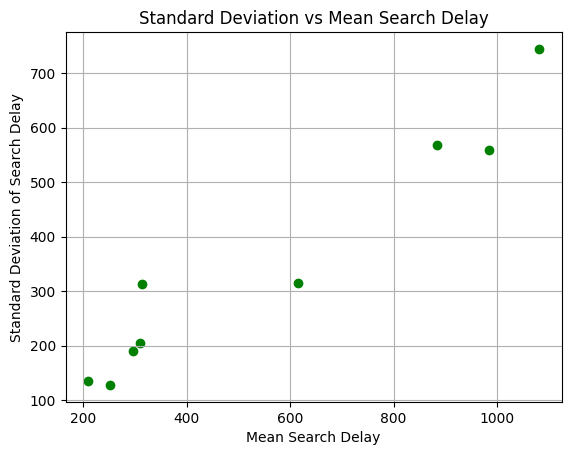

In [52]:
plt.scatter(mean_search_delays, std_search_delays,color="green")
plt.xlabel("Mean Search Delay")
plt.ylabel("Standard Deviation of Search Delay")
plt.title("Standard Deviation vs Mean Search Delay")
plt.grid(True)
plt.show() # Can use plt.savefig as well but then everytime we run the code, a plot will be saved

In [53]:
# The function compute_slope_through_origin uses the least squares method to find the best-fit slope for a regression line that passes through the origin

shape_parameter_estimate = (compute_slope_through_origin(std_search_delays, mean_search_delays))**2
# In a Gamma distribution, the shape parameter (a) is related to the squared ratio of mean/std deviation, since this is estimated as the slope of the regression line between 
# standard deviations (std_search_delays) and means (mean_search_delays), squaring this slope provides an estimate of the shape parameter for the Gamma distribution
print(f"Estimated Shape Parameter: {shape_parameter_estimate:.4f}")

Estimated Shape Parameter: 2.4171


## 3. (b)
On each of the columns that did not contribute to the shape parameter estimation, randomly select one half of the samples. Using all the selected samples, estimate the rate parameter and print its value.

In [54]:
# Identify the remaining columns that are not part of the selected columns
remaining_columns = [col for col in search_times_df.columns if col not in selected_columns]
# Extract data from the remaining columns starting from the third row (index 2) and convert values to float
# Subtracting 328 from all values to remove the baseline value
remaining_data = search_times_df.iloc[2:].astype(float)[remaining_columns] - 328
# Randomly select half of the samples (rows)
selected_samples = remaining_data.sample(frac=0.5)

In [55]:
# Compute the mean of each column in the selected samples
sample_means = selected_samples.mean().values
# Compute the standard deviation of each column in the selected samples
sample_std_devs = selected_samples.std().values

print("Sample Means:", sample_means)
print("Sample Standard Deviations:", sample_std_devs)

Sample Means: [1090.72222222  288.22222222  454.75        522.22222222  317.55555556
  229.83333333  800.5         310.91666667  225.08333333]
Sample Standard Deviations: [646.88160149 172.69859973 301.78378021 417.22629085 183.51962829
 165.86440245 423.46539747 204.02063971 169.49629157]


In [56]:
# Estimate the rate parameter(b) for a Gamma distribution by fitting the relationship between variance(std dev squared) and mean
rate_parameter_estimate = compute_slope_through_origin(sample_std_devs**2, sample_means)
print(f"Estimated Rate Parameter: {rate_parameter_estimate:.4f}")

Estimated Rate Parameter: 0.0031


## 3. (c)
From each of the columns used for 3(b), collect the remaining half of the samples that did not contribute to the rate parameter estimation. Accumulate all these samples into an array named search_delays. Plot the empirical cdf of the samples in search_delays. On the same figure, plot the Gamma(a, b) cdf, say G, where a is the shape parameter estimated in 3(a) and b is the rate parameter estimated in 3(b). Print the value of the so‐called Kolmogorov–Smirnov test statistic

In [57]:
# Drop the randomly selected rows to get the remaining samples
remaining_samples = remaining_data.drop(index=selected_samples.index).values.flatten()

# Remove NaN values from the flattened array (if any)
search_delays = remaining_samples[~np.isnan(remaining_samples)]

In [58]:
# Computing empirical CDF
search_delays_sorted = np.sort(search_delays)
empirical_cdf = np.arange(1, len(search_delays_sorted) + 1) / len(search_delays_sorted)
# Computing Gamma CDF using shape and rate parameter
gamma_cdf = st.gamma.cdf(search_delays_sorted, a=shape_parameter_estimate, scale = 1/rate_parameter_estimate)

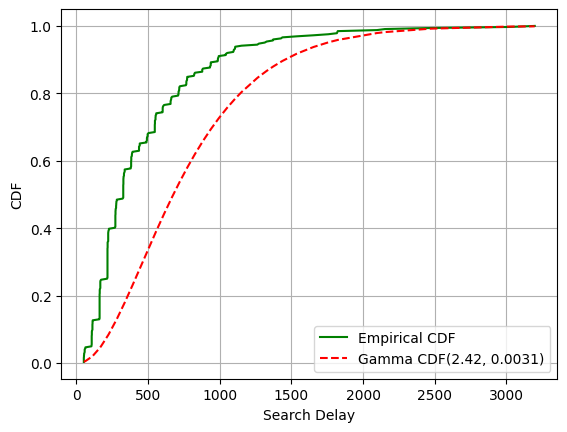

In [59]:
plt.plot(search_delays_sorted, empirical_cdf, label="Empirical CDF", linestyle="-", color="green")
plt.plot(search_delays_sorted, gamma_cdf, label=f"Gamma CDF({shape_parameter_estimate:.2f}, {rate_parameter_estimate:.4f})", linestyle="--", color="red")
plt.xlabel("Search Delay")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show() # Can use plt.savefig as well but then everytime we run the code, a plot will be saved

We can compute the Kolmogorov-Smirnov statistic using the following formula $$KS(F, G) = \max_x |F(x) - G(x)|$$


In [60]:
# Computing Kolmogorov-Smirnov statistic
ks_test_statistic = np.max(np.abs(empirical_cdf - st.gamma.cdf(search_delays_sorted, a=shape_parameter_estimate, scale = 1/rate_parameter_estimate)))
print(f"Kolmogorov-Smirnov Test Statistic: {ks_test_statistic:.6f}")

Kolmogorov-Smirnov Test Statistic: 0.395552
